# Jupyter Notebook and NumPy introduction

Jupyter notebook is often used by data scientists who work in Python. It is loosely based on Mathematica and combines code, text and visual output in one page.

## Basic Jupyter Notebook commands

Some relevant short cuts:
* ```SHIFT + ENTER``` executes 1 block of code called a cell
* Tab-completion is omnipresent after the import of a package has been executed
* ```SHIFT + TAB``` gives you extra information on what parameters a function takes
* Repeating ```SHIFT + TAB``` multiple times gives you even more information

To get used to these short cuts try them out on the cell below.

In [ ]:
print('Hello world!')
print(list(range(5)))

## Imports

In Python you need to import tools to be able to use them. In this workshop we will mainly use the numpy toolbox and you can import it like this:

In [ ]:
import numpy as np

## Parts to be implemented

In cells like the following example you are expected to implement some code. The remainder of the tutorial won't work if you skip these.

Sometimes assertions are added as a check.

In [ ]:
# To proceed, implement the missing code, and remove the 'raise NotImplementedException()'

### BEGIN SOLUTION
three = 3
### END SOLUTION
# three = ?
assert three == 3

print('Good job!')

## Numpy arrays

We'll be working often with numpy arrays so here's a short introduction. 
[`np.array()`](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.array.html) create a new array.

In [ ]:
import numpy as np

# This is a two-dimensional numpy array:
arr = np.array([[1,2,3,4],[5,6,7,8]])
print(arr, '\n')

# The shape is a tuple describing the size of each dimension
print(f"shape={arr.shape}")

# Elements are selected by specifying two indices, counting from 0
print(f"arr[1][3] = {arr[1][3]}")

print()
# This is a three-dimensional numpy array
arr3 = np.array([[[1, 2, 3, 4], [5, 6, 7, 8]], [[9, 10, 11, 12], [13, 14, 15, 16]]])
print(arr3, '\n')

print(f"shape={arr3.shape}")

# Elements in a three dimensional array are selected by specifying three indices, counting from 0
print(f"arr3[1][0][2] = {arr3[1][0][2]}")

Notice how we used `print(f"foo {bar}")` to enter a variable `bar` into the print statement using curly brackets? This syntax is called 'f-strings' (notice the `f` before the first quote), extra documentation can be found [here](https://www.datacamp.com/community/tutorials/f-string-formatting-in-python).

In [ ]:
# The numpy reshape method allows one to change the shape of an array, while keeping the underlying data.
# One can leave one dimension unspecified by passing -1, it will be determined from the size of the data.

print("Original array:")
print(arr, '\n')

print("As 4x2 matrix")
print(np.reshape(arr, (4,2)), '\n')

print("As 8x1 matrix")
print(np.reshape(arr, (-1,1)), '\n')

print("As 2x2x2 array")
print(np.reshape(arr, (2,2,-1)))

In [ ]:
# the numpy sum, mean min and max can be used to calculate aggregates across any axis
table = np.array([[10.9, 12.1, 15.2, 7.3], [3.9, 1.2, 34.6, 8.3], [1.9, 23.3, 1.2, 3.7]])
print(table)

# Calculating the maximum across the first axis (=0).
max0 = np.max(table, axis=0)
# Calculating the maximum across the second axis (=1).
max1 = np.max(table, axis=1)
# Calculating the overall maximum.
max_overall = np.max(table)

print(f"Maximum over the rows of the table = {max0}")
print(f"Maximum over the columns of the table = {max1}")
print(f"Overall maximum of the table = {max_overall}")

Basic arithmetical operations on arrays of the same shape are done elementwise: 

In [ ]:
x = np.array([1.,2.,3.])
y = np.array([4.,5.,6.])

print(x + y)
print(x - y)
print(x * y)
print(x / y)

## Data plotting

We use matplotlib.pyplot to make various types of plots

In [5]:
import matplotlib.pyplot as plt

#### A basic plot a list of values

In [ ]:
plt.plot([7.3, 8.2, 1.2, 3.2, 9.1, 1.5])
plt.show()

#### Plotting a list of X and Y values

In [ ]:
plt.plot([100.0, 110.0, 120.0, 130.0, 140.0, 150.0],[2.3, 8.1, 9.3, 9.7, 9.8, 20.0])
plt.show()

#### Using mathematical functions and plotting more than one line on a graph

In [ ]:
x = np.arange(0.0, 10.0, 0.1)
print(x)

In [ ]:
# Most numpy function work on arrays as well by applying the function to each element in turn
y_cos = np.cos(x)
y_sin = np.sin(x)
plt.plot(x, y_cos, x, y_sin)
plt.show()

## Data import and inspection (optional)

[Pandas](http://pandas.pydata.org/) is a popular library for data wrangling, we'll use it to load and inspect a csv file that contains the historical web request and cpu usage of a web server:

In [15]:
import pandas as pd

data = pd.read_csv("data/request_rate_vs_CPU.csv")
print(f'The dataframe has {data.shape[0]} rows and {data.shape[1]} columns')

The dataframe has 288 rows and 8 columns


The head command allows one to quickly inspect the first rows of the loaded data:

In [16]:
data.head()

,Unnamed: 0,products/science.html,products/non-fiction.html,products/fiction.html,api/comment,api/product/get.php,resources/js/basket.js,CPU
0,2016-08-21 08:00:00,134.835762,22.753042,35.713667,37.523528,51.146578,25.978119,37.157171
1,2016-08-21 08:05:00,85.566227,20.918883,27.833613,29.001516,46.606963,19.972983,22.831506
2,2016-08-21 08:10:00,121.476458,18.470509,42.939950,30.845971,48.326172,25.550460,39.923117
3,2016-08-21 08:15:00,106.727355,19.734051,28.055008,40.791409,45.765364,25.644494,41.624054
4,2016-08-21 08:20:00,136.213476,25.699896,40.172650,33.057671,48.259501,16.087842,30.987077


We can select the CPU column and plot the data:

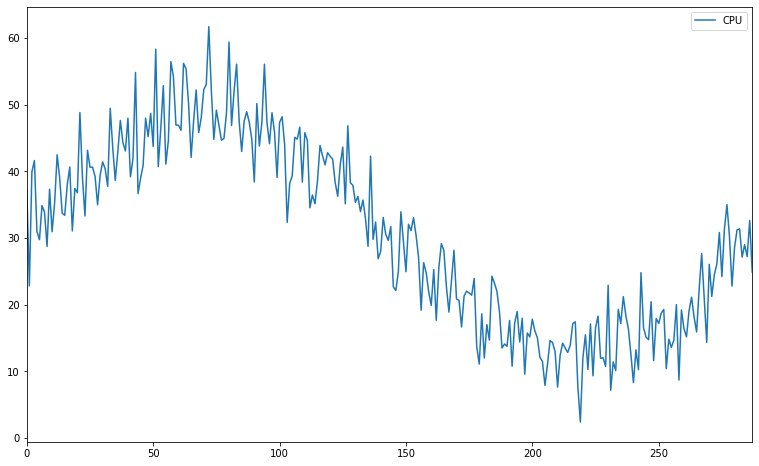

In [8]:
data.plot(figsize=(13,8), y="CPU")
plt.show()

Note that to show the plot, we need to import `matplotlib.pyplot` and execute the `show()` function.

Next we plot the request rates, leaving out the CPU column  as it has another unit:

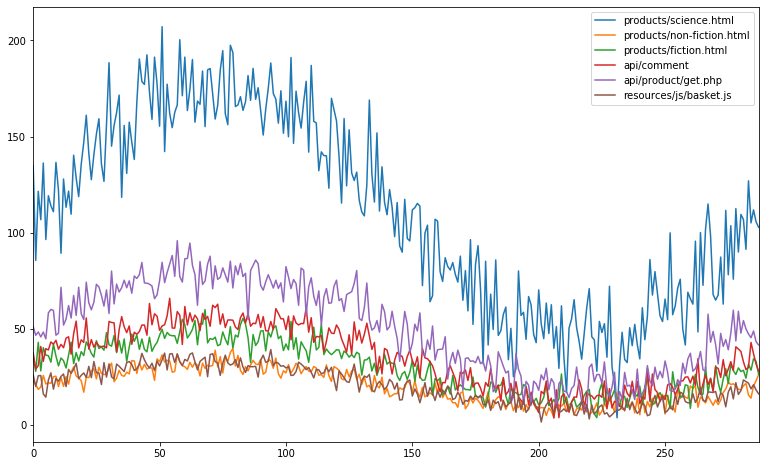

In [9]:
data.drop(columns='CPU').plot(figsize=(13,8))
plt.show()

Now to continue and start on modelling the data, we'll work with basic numpy arrays. By doing this we also drop the time-information as shown in the plots above.

We extract the column labels as the request_names for later reference:

In [18]:
request_names = data.drop(columns='CPU').columns.values
request_names

array(['Unnamed: 0', 'products/science.html', 'products/non-fiction.html',
       'products/fiction.html', 'api/comment', 'api/product/get.php',
       'resources/js/basket.js'], dtype=object)

We extract the request rates as a 2-dimensional numpy array:

In [19]:
request_rates = data.drop(columns='CPU').values
print(request_rates.shape)
request_rates

(288, 7)


array([['2016-08-21 08:00:00', 134.835761848, 22.753042458000003, ...,
        37.5235279984, 51.14657756729999, 25.978119290100004],
       ['2016-08-21 08:05:00', 85.56622711060001, 20.918882819300002,
        ..., 29.0015158868, 46.606963461599996, 19.97298273],
       ['2016-08-21 08:10:00', 121.47645775299999, 18.470508861, ...,
        30.845971137800003, 48.3261721288, 25.550459826500003],
       ...,
       ['2016-08-22 07:45:00', 111.827972924, 20.317726288699998, ...,
        37.0041893625, 48.826049070399996, 20.901687913099998],
       ['2016-08-22 07:50:00', 105.622016181, 22.9262920756, ...,
        31.656464423000003, 43.29062839229999, 18.2027885432],
       ['2016-08-22 07:55:00', 102.789516332, 26.1359873123, ...,
        27.946163755, 41.572344827100004, 16.1644038586]], dtype=object)

and the cpu usage as a one-dimensional numpy array

In [20]:
cpu = data['CPU'].values
cpu

array([37.15717068, 22.83150616, 39.92311674, 41.62405385, 30.98707726,
       29.75520591, 34.86917088, 33.89065473, 28.74578966, 37.32043549,
       30.94574298, 35.29240546, 42.47826894, 38.97174646, 33.72886917,
       33.41458534, 37.99202856, 40.65343495, 31.06935212, 37.43285562,
       36.78977337, 48.82205874, 39.11336916, 33.31467168, 43.16982097,
       40.62573527, 40.63159758, 39.24492392, 34.98744464, 39.42994584,
       41.41854389, 40.37546054, 37.75002881, 49.45016658, 43.4962436 ,
       38.63662933, 42.94616302, 47.62938125, 44.3381278 , 43.05966789,
       47.97190224, 39.18271922, 41.93410109, 54.8301092 , 36.65748726,
       38.94114477, 40.8727752 , 47.97820016, 45.21240076, 48.69302521,
       43.72414489, 58.33081823, 40.70891924, 46.45527932, 52.85327785,
       41.08781924, 44.60626146, 56.46405367, 54.16621118, 46.93198417,
       46.92912072, 46.17364585, 56.19062891, 55.37250917, 50.08158463,
       42.09516417, 47.6157627 , 52.20765062, 45.80608211, 48.03